## Data Exploration

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import shapiro, skew, kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv("digital_wallet_transactions.csv")
data.head(5).T

,0,1,2,3,4
idx,1,2,3,4,5
transaction_id,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,2a393013-733c-4add-9f09-bed1eeb33676,9a07ad19-4673-4794-9cd2-9b139f39c715,76418260-c985-4011-979d-0914604d0d68
user_id,USER_05159,USER_07204,USER_00903,USER_01769,USER_03544
transaction_date,2023-08-19 03:32,2023-08-19 04:37,2023-08-19 05:52,2023-08-19 06:35,2023-08-19 06:36
product_category,Rent Payment,Gas Bill,Bus Ticket,Internet Bill,Loan Repayment
product_name,2BHK Flat Deposit,Commercial Gas Connection,Semi-Sleeper,4G Unlimited Plan,Home Loan EMI
merchant_name,Airbnb,Adani Gas,MakeMyTrip Bus,Airtel Broadband,Axis Bank
product_amount,1525.39,1495.4,1267.71,9202.63,3100.58
transaction_fee,36.69,28.19,11.36,6.41,41.15
cashback,19.19,89.99,95.7,82.24,40.47


In [5]:
print("Missing Values:")
data.isnull().sum() 

Missing Values:


idx                   0
transaction_id        0
user_id               0
transaction_date      0
product_category      0
product_name          0
merchant_name         0
product_amount        0
transaction_fee       0
cashback              0
loyalty_points        0
payment_method        0
transaction_status    0
merchant_id           0
device_type           0
location              0
dtype: int64

In [8]:
''' No missing values are found

In [6]:
print("\nData Types:")
data.dtypes


Data Types:


idx                     int64
transaction_id         object
user_id                object
transaction_date       object
product_category       object
product_name           object
merchant_name          object
product_amount        float64
transaction_fee       float64
cashback              float64
loyalty_points          int64
payment_method         object
transaction_status     object
merchant_id            object
device_type            object
location               object
dtype: object

In [7]:
data['transaction_date'] = pd.to_datetime(data['transaction_date'], errors='coerce')
date_conversion_issues = data['transaction_date'].isnull().sum()
print(f"\nNumber of invalid dates after conversion: {date_conversion_issues}")


Number of invalid dates after conversion: 0


In [8]:
duplicate_rows = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


In [8]:
''' No duplicate values

In [9]:
print("\nUnique Values in Categorical Columns:")
categorical_columns = ['transaction_status', 'payment_method']
for col in categorical_columns:
    print(f"{col}: {data[col].unique()}")


Unique Values in Categorical Columns:
transaction_status: ['Successful' 'Failed' 'Pending']
payment_method: ['Debit Card' 'UPI' 'Wallet Balance' 'Credit Card' 'Bank Transfer']


In [10]:
print("\nSummary Statistics (Numerical Columns):")
data[['product_amount', 'transaction_fee', 'cashback']].describe()


Summary Statistics (Numerical Columns):


,product_amount,transaction_fee,cashback
count,5000.000000,5000.000000,5000.000000
mean,4957.502722,25.188874,50.658782
std,2885.034160,14.535298,28.522467
min,10.090000,0.010000,0.000000
25%,2453.977500,12.665000,26.495000
50%,4943.685000,25.070000,51.390000
75%,7444.815000,37.947500,75.067500
max,9996.950000,49.990000,100.000000


In [11]:
''' overall the data looks clean with no missing or duplicate values.

# Revenue Analysis

In [12]:
data['transaction_date'] = pd.to_datetime(data['transaction_date'], errors='coerce') # Convert `transaction_date` to datetime

successful_transactions = data[data['transaction_status'] == 'Successful'] # successful transactions

successful_transactions['total_revenue'] = (
    successful_transactions['product_amount'] + successful_transactions['transaction_fee']
) # total revenue for each transaction

daily_revenue = successful_transactions.groupby(successful_transactions['transaction_date'].dt.date)[
    'total_revenue'
].sum().reset_index() # Avg revenue by date

daily_revenue.columns = ['date', 'total_revenue']
successful_transactions.head().T


,0,1,2,3,4
idx,1,2,3,4,5
transaction_id,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,2a393013-733c-4add-9f09-bed1eeb33676,9a07ad19-4673-4794-9cd2-9b139f39c715,76418260-c985-4011-979d-0914604d0d68
user_id,USER_05159,USER_07204,USER_00903,USER_01769,USER_03544
transaction_date,2023-08-19 03:32:00,2023-08-19 04:37:00,2023-08-19 05:52:00,2023-08-19 06:35:00,2023-08-19 06:36:00
product_category,Rent Payment,Gas Bill,Bus Ticket,Internet Bill,Loan Repayment
product_name,2BHK Flat Deposit,Commercial Gas Connection,Semi-Sleeper,4G Unlimited Plan,Home Loan EMI
merchant_name,Airbnb,Adani Gas,MakeMyTrip Bus,Airtel Broadband,Axis Bank
product_amount,1525.39,1495.4,1267.71,9202.63,3100.58
transaction_fee,36.69,28.19,11.36,6.41,41.15
cashback,19.19,89.99,95.7,82.24,40.47


In [27]:
daily_revenue.head()

,date,total_revenue
0,2023-08-19,92898.82
1,2023-08-20,99549.43
2,2023-08-21,78793.85
3,2023-08-22,47909.38
4,2023-08-23,71089.39


In [13]:
# Normality Test - Shapiro-Wilk Test
shapiro_test_stat, shapiro_p_value = shapiro(successful_transactions['total_revenue'])

revenue_skewness = skew(successful_transactions['total_revenue'])
revenue_kurtosis = kurtosis(successful_transactions['total_revenue'])

print("Distribution Analysis:")
print(f"Shapiro-Wilk Test Statistic: {shapiro_test_stat:.4f}")
print(f"Shapiro-Wilk p-value: {shapiro_p_value:.4f}")
print(f"Skewness: {revenue_skewness:.4f}")
print(f"Kurtosis: {revenue_kurtosis:.4f}")

Distribution Analysis:
Shapiro-Wilk Test Statistic: 0.9546
Shapiro-Wilk p-value: 0.0000
Skewness: 0.0261
Kurtosis: -1.2050


In [ ]:
''' Observations -
1. The data does not follow a normal distribution, as indicated by the Shapiro-Wilk test.
2. The distribution is approximately symmetric, with no strong skew.
3. The data is flatter than a normal distribution, indicating lower variability in extreme values. '''

# Merchant Analysis

In [23]:
# Finding Revenue per merchant using groupby 
merchant_revenue = successful_transactions.groupby('merchant_id')['total_revenue'].sum().reset_index()
merchant_revenue = merchant_revenue.sort_values(by='total_revenue', ascending=False)

# Finding number of transactions per merchant
merchant_transactions = successful_transactions['merchant_id'].value_counts().reset_index()
merchant_transactions.columns = ['merchant_id', 'transaction_count']

# Average Revenue per merchant
merchant_avg_revenue = successful_transactions.groupby('merchant_id')['total_revenue'].mean().reset_index()
merchant_avg_revenue.columns = ['merchant_id', 'avg_revenue_per_transaction']

# Merging
merchant_analysis = merchant_revenue.merge(merchant_transactions, on='merchant_id').merge(
    merchant_avg_revenue, on='merchant_id'
)

# Calculation
merchant_analysis['revenue_contribution_percentage'] = (merchant_analysis['total_revenue'] / merchant_analysis['total_revenue'].sum()) * 100

print("Top 5 Merchants by Revenue and their Contribution:")
merchant_analysis.head()

Top 5 Merchants by Revenue and their Contribution:


,merchant_id,total_revenue,transaction_count,avg_revenue_per_transaction,revenue_contribution_percentage
0,MERCH_0376,74374.06,14,5312.432857,0.314094
1,MERCH_0245,70552.86,14,5039.490000,0.297956
2,MERCH_0335,64385.44,13,4952.726154,0.271910
3,MERCH_0091,62528.38,10,6252.838000,0.264067
4,MERCH_0594,62200.49,9,6911.165556,0.262683


# Transactions Trend Analysis

In [29]:
data['date'] = data['transaction_date'].dt.date  # Extract date
data['day_of_week'] = data['transaction_date'].dt.day_name()  # Extract day of the week
data['hour'] = data['transaction_date'].dt.hour  # Extract hour of the day

# Aggregate daily transactions
daily_trends = data.groupby('date').agg(
    transaction_count=('transaction_id', 'count'),
    total_amount=('product_amount', 'sum'),  # Fixed column name
    total_fees=('transaction_fee', 'sum')
).reset_index()

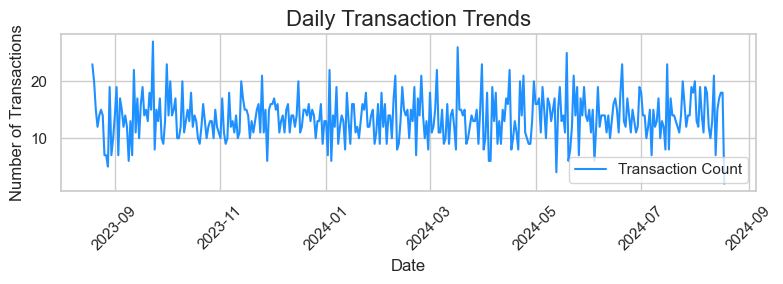

In [36]:
plt.figure(figsize=(8, 3))
sns.lineplot(x='date', y='transaction_count', data=daily_trends, color="dodgerblue", label="Transaction Count")
plt.title("Daily Transaction Trends", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


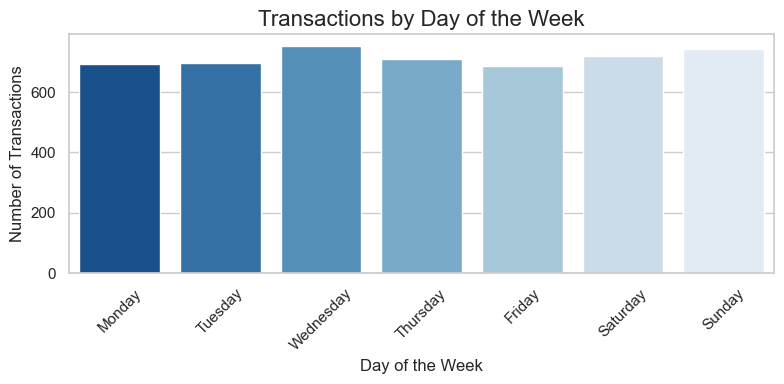

In [38]:
weekly_trends = data.groupby('day_of_week').agg(transaction_count=('transaction_id', 'count')).reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)


plt.figure(figsize=(8, 4))
sns.barplot(x=weekly_trends.index, y=weekly_trends['transaction_count'], palette="Blues_r")
plt.title("Transactions by Day of the Week", fontsize=16)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

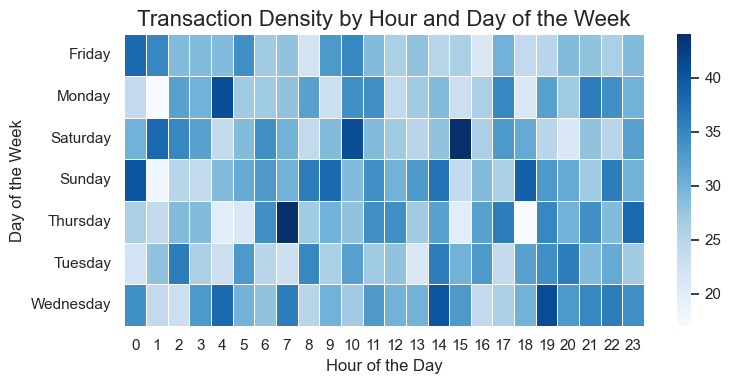

In [35]:
hourly_trends = data.groupby(['day_of_week', 'hour']).size().unstack()

plt.figure(figsize=(8, 4))
sns.heatmap(hourly_trends, cmap="Blues", annot=False, linewidths=0.5)
plt.title("Transaction Density by Hour and Day of the Week", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Day of the Week", fontsize=12)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [14]:
''' Observations 
- The transaction volume fluctuates daily, with noticeable peaks and troughs.
- Certain days show higher transaction counts, possibly influenced by salary payments, promotions, or specific user behavior patterns.
- The total transaction amount also follows a similar trend, indicating that high transaction counts generally correlate with higher total revenue.

SyntaxError: invalid syntax (3473434758.py, line 1)

# Using Time Series to predict the Revenue for Next 3 months 

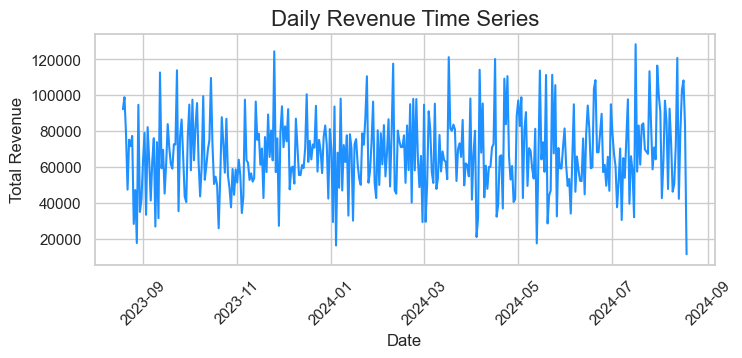

In [44]:
daily_revenue = data.groupby(data['transaction_date'].dt.date)['product_amount'].sum().reset_index()
daily_revenue.rename(columns={'transaction_date': 'date', 'product_amount': 'total_revenue'}, inplace=True)

daily_revenue['date'] = pd.to_datetime(daily_revenue['date'])
daily_revenue.set_index('date', inplace=True)

# Raw Time Series Data
plt.figure(figsize=(8, 3))
sns.lineplot(data=daily_revenue, x=daily_revenue.index, y='total_revenue', color="dodgerblue")
plt.title("Daily Revenue Time Series", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.show()

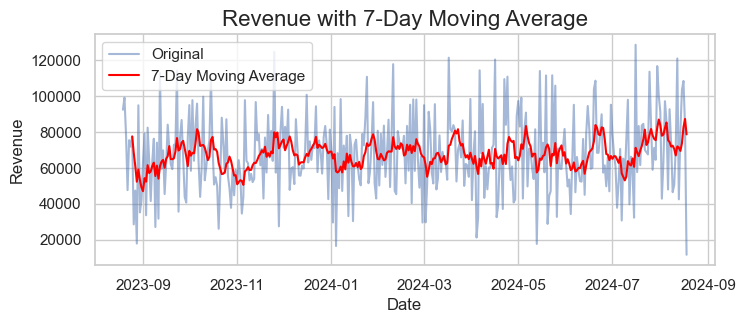

In [46]:
daily_revenue['rolling_avg'] = daily_revenue['total_revenue'].rolling(window=7).mean()

# moving average
plt.figure(figsize=(8, 3))
sns.lineplot(data=daily_revenue, x=daily_revenue.index, y='total_revenue', label="Original", alpha=0.5)
sns.lineplot(data=daily_revenue, x=daily_revenue.index, y='rolling_avg', label="7-Day Moving Average", color="red")
plt.title("Revenue with 7-Day Moving Average", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.legend()
plt.show()

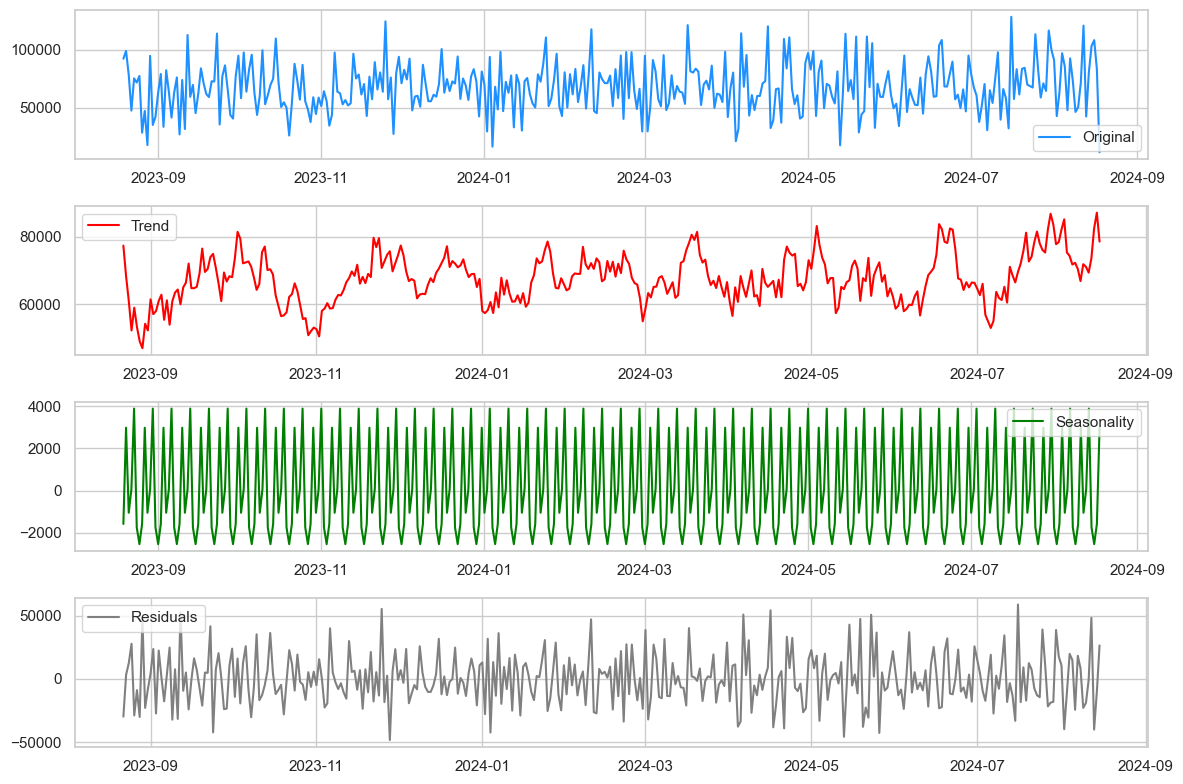

In [50]:
# Decomposing Time Series
decomposition = seasonal_decompose(daily_revenue['total_revenue'], model='additive', period=7)

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(daily_revenue['total_revenue'], label='Original', color="dodgerblue")
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color="red")
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality', color="green")
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals', color="gray")
plt.legend()

plt.tight_layout()
plt.show()

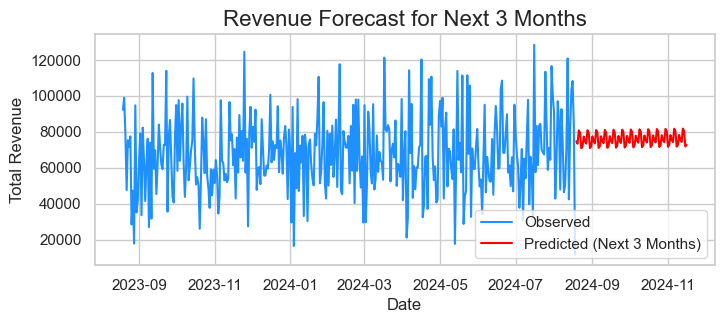

In [53]:
# Forecast Next 3 Months Using Exponential Smoothing
model = ExponentialSmoothing(daily_revenue['total_revenue'], trend='add', seasonal='add', seasonal_periods=7)
fit_model = model.fit()

# Predict for the next 90 days (3 months)
future_dates = pd.date_range(start=daily_revenue.index[-1], periods=91, freq='D')[1:]
predictions = fit_model.forecast(90)

plt.figure(figsize=(8, 3))
plt.plot(daily_revenue.index, daily_revenue['total_revenue'], label="Observed", color="dodgerblue")
plt.plot(future_dates, predictions, label="Predicted (Next 3 Months)", color="red")
plt.title("Revenue Forecast for Next 3 Months", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.legend()
plt.show()

# Fraud/ Anamoly Detection 

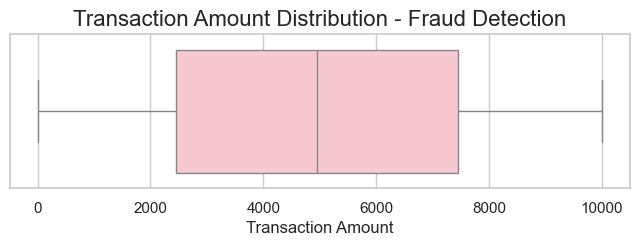

In [83]:
features = ['product_amount', 'transaction_fee', 'cashback', 'loyalty_points']
df = data[features].copy()

threshold = df['product_amount'].quantile(0.99)  # Transactions above 99th percentile for abnormally large amounts
potential_fraud = data[data['product_amount'] > threshold]

# IQR Method for Anomaly Detection
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df['outlier_iqr'] = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

# Z-Score Method for Anomaly Detection
df['z_score'] = (df['product_amount'] - df['product_amount'].mean()) / df['product_amount'].std()
df['outlier_zscore'] = abs(df['z_score']) > 3  # Mark as anomaly if z-score > 3

# Isolation Forest Based Anomaly Detection (ML)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['product_amount', 'transaction_fee', 'cashback']])

model = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)
df['fraud_isolation_forest'] = model.fit_predict(df_scaled)  # -1 = anomaly, 1 = normal

# Merging
data['fraud_iqr'] = df['outlier_iqr']
data['fraud_zscore'] = df['outlier_zscore']
data['fraud_isolation_forest'] = df['fraud_isolation_forest']

# Plot
plt.figure(figsize=(8, 2))
sns.boxplot(x=data['product_amount'], color="pink")
plt.title("Transaction Amount Distribution - Fraud Detection", fontsize=16)
plt.xlabel("Transaction Amount", fontsize=12)
plt.show()


In [79]:
# Filter suspected fraudulent transactions
fraud_cases = data[(data['fraud_iqr']) | (data['fraud_zscore']) | (data['fraud_isolation_forest'] == -1)].head()
fraud_cases_display = fraud_cases[['transaction_id', 'product_amount', 'transaction_fee', 
                                   'cashback', 'fraud_iqr', 'fraud_zscore', 'fraud_isolation_forest']]

styled_table = fraud_cases_display.style.set_table_styles(
    [{'selector': 'th', 'props': [('font-weight', 'bold')]}]
).set_caption(" Potential Fraud Cases Detected")

styled_table

,transaction_id,product_amount,transaction_fee,cashback,fraud_iqr,fraud_zscore,fraud_isolation_forest
19,270daf0a-8051-4c9b-8391-130eb2072ea8,307.810000,3.260000,2.420000,False,False,-1
49,09c210a8-42b4-40e2-aea3-9d8496c372a0,408.340000,9.820000,99.570000,False,False,-1
61,a9356e2d-5f4e-487e-b812-6010c743745f,8716.700000,49.550000,11.570000,False,False,-1
129,78b81362-4180-43e2-a794-97888a41faa5,159.650000,40.690000,99.870000,False,False,-1
153,1e6b10b2-3d7e-4706-a49b-34c93572cc7a,9532.340000,5.140000,3.660000,False,False,-1


In [ ]:
''' Observations 
- We detected multiple outliers in the dataset using statistical and machine learning methods.
- These transactions had either abnormally high amounts, transaction fees, or cashback values.
- The Isolation Forest method flagged several transactions as potential fraud cases (labeled -1).